Task 1: MCP Neurons
Implementation Tasks:

Implement MCP Neurons for AND and OR Boolean functions.
Answer the Following Questions:


Question 1: List out all the limitations of MCP Neurons.

The perceptron operates with two main limitations because it cannot handle non-linear separations or execute XOR functions. Reinforcement learning is prevented because the perceptron maintains fixed manual thresholds that operators must select from a given range. Because it produces limited output as 0 or 1 binaries the perceptron experiences restricted performance in demanding tasks since it cannot establish multi-level networks.

Question 2: Can you develop a logic to solve the XOR function using an MCP Neuron? (Can you devise if-else rules?)

The XOR problem cannot be solved by MCP neurons because the XOR function has no linear-separability property. The non-linear boundary needed for XOR is outside the capability of MCP neurons to generate.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def MCP_Neurons_AND(X1, X2, T):
    assert len(X1) == len(X2)
    state_neuron = []
    for i in range(len(X1)):
        if (X1[i] + X2[i]) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron
    
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  
result = MCP_Neurons_AND(X1, X2, T)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [5]:
def MCP_Neurons_OR(X1, X2, T):
    assert len(X1) == len(X2)
    state_neuron = []
    for i in range(len(X1)):
        if (X1[i] + X2[i]) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron
    
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  
result_or = MCP_Neurons_OR(X1, X2, T)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Task 2

In [11]:
#Step 1: Load the Dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv")
X = df_0_1.drop(columns=["label"]).values  
y = df_0_1["label"].values
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Question 3: What does the shape of X represent?

Every image row enters as a flattened set of 784 pixels in this matrix with pixel values displayed in separate columns.


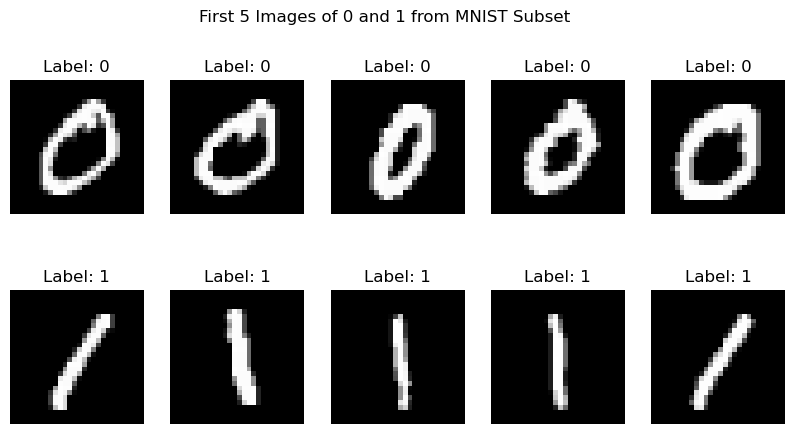

In [19]:
 images_0 = X[y == 0] 
 images_1 = X[y == 1] 

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()


In [23]:
 weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
 bias = 0
 learning_rate = 0.1
 epochs = 100

Question 5: What does the weights array represent in this context?

The significance of every image pixel exists for determining the binary status of "0" or "1."

Question 6: Why are we initializing the weights to zero? What effect could this have on the training process?

Simple calculations result from zero initialization yet it means all neurons tend to acquire similar learning patterns.

In [25]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Step function activation
    return y_pred_all


In [27]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.
    
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)
    
    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions
    """
    n_samples, n_features = X.shape
    accuracy_list = []
    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            linear_output = np.dot(X[i], weights) + bias
            prediction = 1 if linear_output >= 0 else 0
            if prediction != y[i]:
                weights += learning_rate * (y[i] - prediction) * X[i]
                bias += learning_rate * (y[i] - prediction)
            else:
                correct_predictions += 1
        accuracy = correct_predictions / n_samples
        accuracy_list.append(accuracy)
        print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy * 100:.2f}%')
    accuracy = np.mean(accuracy_list)
    return weights, bias, accuracy


Question 7: What is the purpose of the output = np.dot(X[i], weights) + bias line?

The output value from the line function is derived by performing an inner product of X[i] and weights followed by an addition of bias.

Question 8: What happens when the prediction is wrong? How are the weights and bias updated?

The perceptron uses incorrect predictions to evaluate and adjust weights and bias units which improve future prediction accuracy. The Perceptron Learning Rule performs the process of weight and bias adjustment.

In [29]:
 # After training the model with the perceptron_learning_algorithm
 weights, bias, accuracy = train_perceptron(X, y, weights, bias)
 # Evaluate the model using the new function
 print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 99.67%
Epoch 2/100, Accuracy: 99.82%
Epoch 3/100, Accuracy: 99.87%
Epoch 4/100, Accuracy: 99.87%
Epoch 5/100, Accuracy: 99.90%
Epoch 6/100, Accuracy: 99.93%
Epoch 7/100, Accuracy: 99.98%
Epoch 8/100, Accuracy: 99.95%
Epoch 9/100, Accuracy: 99.89%
Epoch 10/100, Accuracy: 99.92%
Epoch 11/100, Accuracy: 99.95%
Epoch 12/100, Accuracy: 99.98%
Epoch 13/100, Accuracy: 100.00%
Epoch 14/100, Accuracy: 100.00%
Epoch 15/100, Accuracy: 100.00%
Epoch 16/100, Accuracy: 100.00%
Epoch 17/100, Accuracy: 100.00%
Epoch 18/100, Accuracy: 100.00%
Epoch 19/100, Accuracy: 100.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 21/100, Accuracy: 100.00%
Epoch 22/100, Accuracy: 100.00%
Epoch 23/100, Accuracy: 100.00%
Epoch 24/100, Accuracy: 100.00%
Epoch 25/100, Accuracy: 100.00%
Epoch 26/100, Accuracy: 100.00%
Epoch 27/100, Accuracy: 100.00%
Epoch 28/100, Accuracy: 100.00%
Epoch 29/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 31/100, Accuracy: 100.00%
Epoch 32/100, Accuracy: 100.0

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
All images were correctly classified!


Question 9: Why is the final accuracy important, and what do you expect it to be?

The indices which show the images in the dataset fail to match the predicted results are stored in misclassified_idx. The list shows the positions of images that the model incorrectly labeled.

Question 10: What does misclassified_idx store, and how is it used in this code?

The misclassified_idx variable contains the image indexes which demonstrate incorrect model predictions.

Question 11: How do you interpret the result if the output is "All images were correctly classified!"?

A successful model which successfully identifies all the labels in the dataset will display "All images were correctly classified!" thus indicating 100% accuracy. The correct decision boundary learning suggests that the model succeeded but this discovery might point towards overfitting since it only occurs on the training set.

Task 3: Perceptron Algorithm for 3 vs 5 Classification
To-Do:
Implement each step of the Perceptron Algorithm as done for the 0 vs 1 classification task.
Visualize the final misclassified images and provide a conclusion.

In [35]:
df_3_5 = pd.read_csv("mnist_3_and_5.csv")
X_3_5 = df_3_5.drop(columns=["label"]).values
y_3_5 = df_3_5["label"].values
weights_3_5 = np.zeros(X_3_5.shape[1])
bias_3_5 = 0
weights_3_5, bias_3_5 = train_perceptron(X_3_5, y_3_5, weights_3_5, bias_3_5)


Epoch 1/100, Accuracy: 0.00%
Epoch 2/100, Accuracy: 0.00%
Epoch 3/100, Accuracy: 0.00%
Epoch 4/100, Accuracy: 0.00%
Epoch 5/100, Accuracy: 0.00%
Epoch 6/100, Accuracy: 0.00%
Epoch 7/100, Accuracy: 0.00%
Epoch 8/100, Accuracy: 0.00%
Epoch 9/100, Accuracy: 0.00%
Epoch 10/100, Accuracy: 0.00%
Epoch 11/100, Accuracy: 0.00%
Epoch 12/100, Accuracy: 0.00%
Epoch 13/100, Accuracy: 0.00%
Epoch 14/100, Accuracy: 0.00%
Epoch 15/100, Accuracy: 0.00%
Epoch 16/100, Accuracy: 0.00%
Epoch 17/100, Accuracy: 0.00%
Epoch 18/100, Accuracy: 0.00%
Epoch 19/100, Accuracy: 0.00%
Epoch 20/100, Accuracy: 0.00%
Epoch 21/100, Accuracy: 0.00%
Epoch 22/100, Accuracy: 0.00%
Epoch 23/100, Accuracy: 0.00%
Epoch 24/100, Accuracy: 0.00%
Epoch 25/100, Accuracy: 0.00%
Epoch 26/100, Accuracy: 0.00%
Epoch 27/100, Accuracy: 0.00%
Epoch 28/100, Accuracy: 0.00%
Epoch 29/100, Accuracy: 0.00%
Epoch 30/100, Accuracy: 0.00%
Epoch 31/100, Accuracy: 0.00%
Epoch 32/100, Accuracy: 0.00%
Epoch 33/100, Accuracy: 0.00%
Epoch 34/100, Accur

ValueError: too many values to unpack (expected 2)

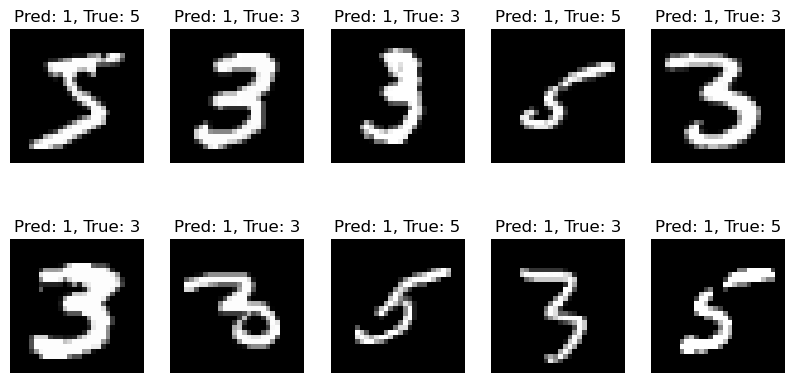

In [37]:
predictions_3_5 = decision_function(X_3_5, weights_3_5, bias_3_5)
misclassified_idx_3_5 = np.where(predictions_3_5 != y_3_5)[0]

if len(misclassified_idx_3_5) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx_3_5[:10]):
        ax.imshow(X_3_5[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {predictions_3_5[idx]}, True: {y_3_5[idx]}")
        ax.axis("off")
    plt.show()
else:
    print("All images were correctly classified!")
